In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import csv
from PIL import Image
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import pickle

In [2]:

# csv file name 
filename = "runas.csv"

# initializing the titles and rows list 
fields = [] 
rows = [] 
image = []
# reading csv file 
with open(filename, 'r') as csvfile: 
    reader = csv.reader(csvfile)
    next(reader)
    ##si se hace line[2] buscaria en las columnas la tecera porque 0,1,2
    for line in reader:
        if(line):
            image.append((line))

In [3]:
print(len(image),image[150])

1166 ['254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '255', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '255', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '255', '255', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '255', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '254', '255', '255', '254', 

In [4]:
for i in range (0,len(image)):
    image[i] = list(map(int, image[i]))

In [5]:
len(image)

1166

5


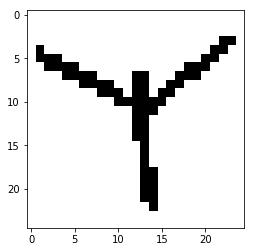

In [11]:
x = np.reshape(image[500][0:625], (25, 25))
print(image[500][625])
plt.imshow(np.asarray(x),cmap='gray')
plt.show()

1


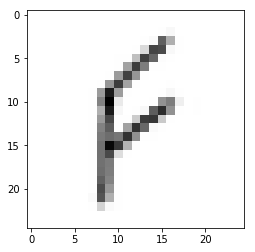

In [73]:
x = np.reshape(image[16][0:625], (25, 25))
print(image[16][625])
plt.imshow(np.asarray(x),cmap='gray')
plt.show()

In [12]:
for i in range (0,len(image)):
    image[i] = np.array(image[i])

In [13]:
print(image[16])

[255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 254 251 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 252
 166 210 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 254 234 151 154 251 254 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 254 254 219 148 169 253 254 255 255
 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 203
 146 182 254 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255
 255 255 255 255 254 199 149 196 254 255 255 255 255 255 255 255 255 255
 255 255 255 255 255 255 255 255 255 255 254 196 146 204 254 255 255 255
 254 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 254 199
 127 200 254 255 255 255 254 250 254 255 255 255 25

1


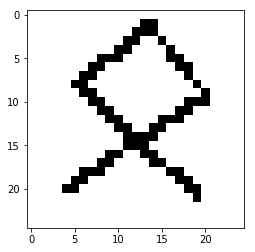

In [14]:
x = np.reshape(image[160][0:625], (25, 25))
print(image[16][625])
plt.imshow(x,cmap='gray')
plt.show()

In [17]:
x = []
y = []
for i in range (0,len(image)):
    x.append(image[i][0:625])
    y.append(image[i][625])

In [19]:
x = np.array(x)
x.shape

(1166, 625)

In [20]:
y = np.array(y)
y.shape

(1166,)

In [61]:
x_train, x_test, y_train, y_test = x[:800], x[800:], y[:800], y[800:]

In [26]:
shuffle_index = np.random.permutation(800)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

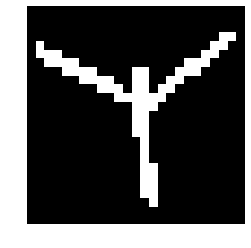

In [36]:
some_digit = x[500]
some_digit_image = some_digit.reshape(25, 25)

plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [37]:
y_train_5 = (y_train == 5)  #true for all 5s.
y_test_5 = (y_test == 5)

In [38]:
print (y_train_5)

[False False False False False False  True False False False  True  True
 False False  True False  True False False False False False False False
 False False False  True False False False False False False False  True
 False False False False False False False False False False False False
  True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True False False  True  True False False False False False
 False False False False False False False False False False False False
 False False False  True False False False False False  True False False
 False False False False False  True False  True False False False False
  True  True False False False False False  True False False False False
 False  True False False False False False False False False False False
 False False False False  True False False False False False False  True
  True False False False  True False False  True Fa

In [50]:

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [52]:
for i in range (0,len(x_train)):
    print(sgd_clf.predict([x_train[i]]),y_train[i])

[ True] 3
[False] 2
[False] 1
[False] 2
[False] 7
[ True] 2
[ True] 5
[ True] 7
[False] 1
[False] 3
[ True] 5
[ True] 5
[False] 3
[ True] 7
[ True] 5
[False] 4
[ True] 5
[False] 6
[ True] 2
[False] 3
[False] 3
[False] 2
[False] 1
[False] 1
[False] 7
[False] 7
[False] 1
[ True] 5
[False] 2
[False] 7
[False] 2
[False] 1
[False] 6
[ True] 3
[False] 1
[ True] 5
[False] 2
[ True] 1
[False] 4
[ True] 4
[False] 6
[False] 6
[ True] 3
[ True] 1
[False] 7
[False] 2
[False] 6
[False] 4
[ True] 5
[False] 2
[False] 1
[False] 2
[ True] 4
[False] 1
[False] 6
[False] 4
[False] 4
[False] 6
[False] 4
[False] 2
[False] 3
[False] 4
[False] 3
[False] 3
[False] 3
[False] 1
[False] 6
[False] 3
[False] 7
[False] 6
[ True] 4
[False] 2
[False] 6
[False] 1
[ True] 5
[ True] 7
[False] 1
[ True] 5
[ True] 5
[ True] 7
[False] 4
[False] 3
[False] 4
[False] 6
[False] 6
[False] 2
[False] 1
[False] 7
[False] 3
[False] 1
[False] 3
[False] 7
[ True] 7
[False] 1
[False] 1
[False] 4
[False] 6
[False] 4
[ True] 4
[ True] 5


In [53]:


y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [54]:


conf_matrix = confusion_matrix(y_train_5, y_train_pred)
conf_matrix

array([[472, 208],
       [ 85,  35]])

In [55]:
y_train_perfect_prediction = y_train_5
confusion_matrix(y_train_5, y_train_perfect_prediction)

array([[680,   0],
       [  0, 120]])

## Importar el modelo

In [58]:
filename = 'modelo_runas.sav'
pickle.dump(sgd_clf, open(filename, 'wb'))


In [59]:
filename = 'modelo_runas.sav'
loaded_model = pickle.load(open(filename, 'rb'))
print(loaded_model.predict([x_train[500]]),y_train[500])

[False] 4


In [63]:
result = loaded_model.score(x_test, y_test)
print(result)

0.0
